In [1]:
%%capture
!pip install tensorflow

In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
%%capture
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

In [5]:
seq_model = tf.keras.Sequential(name='SequentialModel')

In [6]:
(X_train.shape[1:])

(28, 28)

In [7]:
seq_model.add(tf.keras.layers.InputLayer(shape = X_train.shape[1:], name='InputLayer'))
seq_model.add(tf.keras.layers.Flatten(name='FlattenLayer'))
seq_model.add(tf.keras.layers.Dense(units=300, activation= 'relu', name='hidden1'))
seq_model.add(tf.keras.layers.Dense(units=100, activation= 'relu', name='hidden2'))
seq_model.add(tf.keras.layers.Dense(units=10, activation= 'softmax', name='output'))

In [8]:
seq_model.summary()

Model: "SequentialModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ FlattenLayer (Flatten)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
seq_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
%%capture
history = seq_model.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_val, y_val))

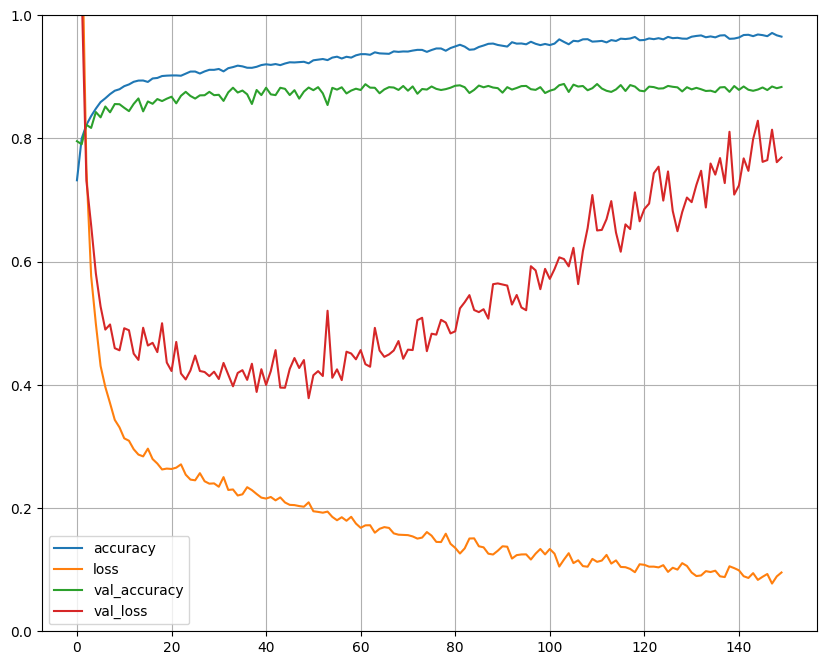

In [13]:
training_info = pd.DataFrame(history.history)
training_info.plot(figsize = (10, 8))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
w1, b1 = seq_model.get_layer('hidden1').get_weights()
w2, b2 = seq_model.get_layer('hidden2').get_weights()
w3, b3 = seq_model.get_layer('output').get_weights()

In [25]:
print(f'w1 shape = {w1.shape}, b1 shape = {b1.shape}')
print(f'w2 shape = {w2.shape}, b2 shape = {b2.shape}')
print(f'w3 shape = {w3.shape}, b3 shape = {b3.shape}')

w1 shape = (784, 300), b1 shape = (300,)
w2 shape = (300, 100), b2 shape = (100,)
w3 shape = (100, 10), b3 shape = (10,)


In [62]:
y_pred = seq_model.predict(X_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [63]:
y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred, axis = 1)

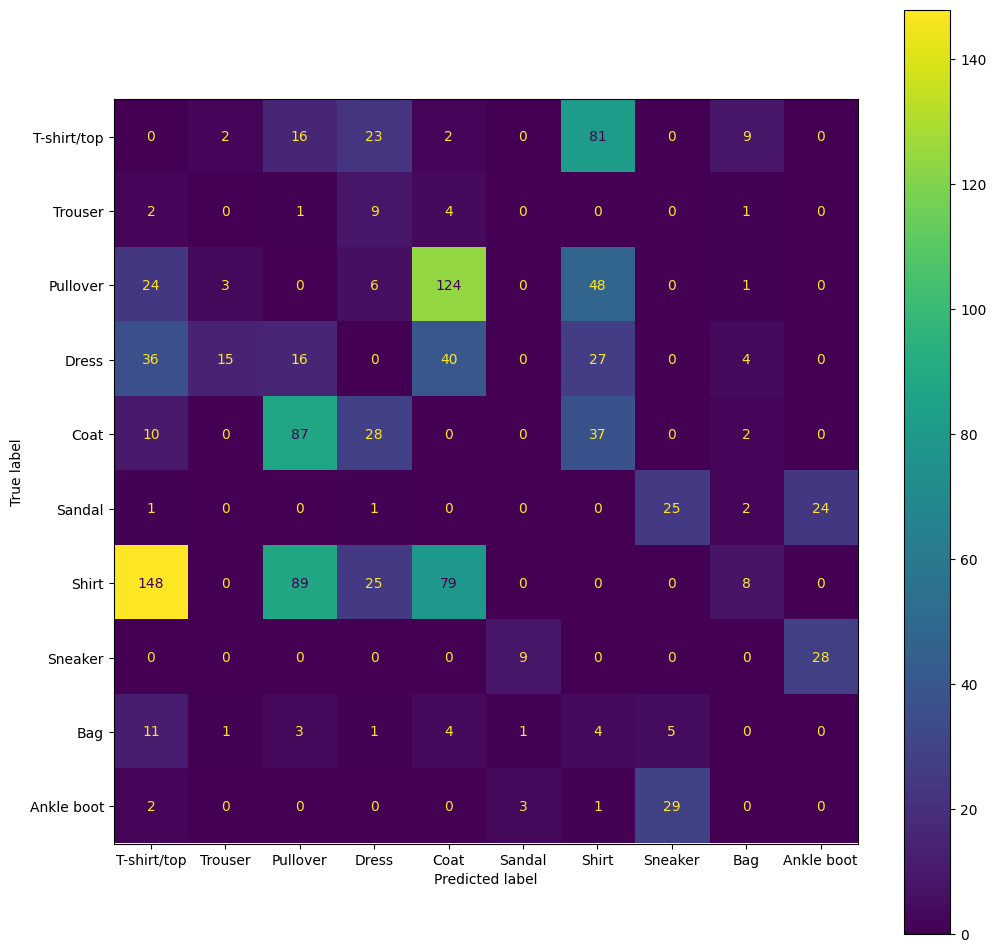

In [67]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred, sample_weight= y_val != y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize = (12, 12))
disp.plot(ax=plt.gca())
plt.show()

In [66]:
print(f'Accuracy Score = {accuracy_score(y_val, y_pred)}')

Accuracy Score = 0.8838
